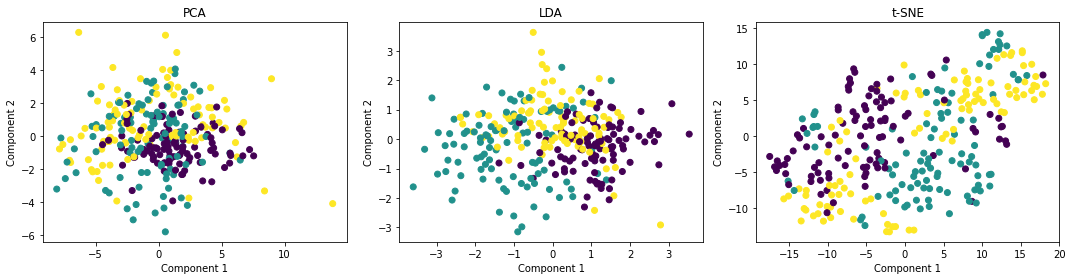

In [1]:
"""
Example: Dimensionality Reduction Techniques (PCA, LDA, t-SNE)
"""

import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.manifold import TSNE
import pandas as pd

# --- 1) Create a sample classification dataset ---
X, y = make_classification(n_samples=300, n_features=10, 
                           n_informative=5, n_redundant=2,
                           n_classes=3, random_state=42)

# --- Put into a dataframe for easier handling ---
df = pd.DataFrame(X)
df['label'] = y

# --- 2) PCA (unsupervised) ---
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# --- 3) LDA (supervised) ---
lda = LDA(n_components=2)
X_lda = lda.fit_transform(X, y)

# --- 4) t-SNE (unsupervised, good for visualization) ---
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
X_tsne = tsne.fit_transform(X)

# --- 5) Plot results ---
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

axes[0].scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis')
axes[0].set_title("PCA")

axes[1].scatter(X_lda[:, 0], X_lda[:, 1], c=y, cmap='viridis')
axes[1].set_title("LDA")

axes[2].scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, cmap='viridis')
axes[2].set_title("t-SNE")

for ax in axes:
    ax.set_xlabel("Component 1")
    ax.set_ylabel("Component 2")

plt.tight_layout()
plt.show()